In [1]:
%matplotlib inline


# Restricted Boltzmann Machine features for digit classification


For greyscale image data where pixel values can be interpreted as degrees of
blackness on a white background, like handwritten digit recognition, the
Bernoulli Restricted Boltzmann machine model (:class:`BernoulliRBM
<sklearn.neural_network.BernoulliRBM>`) can perform effective non-linear
feature extraction.

In order to learn good latent representations from a small dataset, we
artificially generate more labeled data by perturbing the training data with
linear shifts of 1 pixel in each direction.

This example shows how to build a classification pipeline with a BernoulliRBM
feature extractor and a :class:`LogisticRegression
<sklearn.linear_model.LogisticRegression>` classifier. The hyperparameters
of the entire model (learning rate, hidden layer size, regularization)
were optimized by grid search, but the search is not reproduced here because
of runtime constraints.

Logistic regression on raw pixel values is presented for comparison. The
example shows that the features extracted by the BernoulliRBM help improve the
classification accuracy.



In [1]:
from __future__ import print_function

print(__doc__)

# Authors: Yann N. Dauphin, Vlad Niculae, Gabriel Synnaeve
# License: BSD
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from PIL import Image as PImage
from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# #############################################################################
# Setting up

def cropND(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]
    def shift(x, w):
        return convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()

    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y



Automatically created module for IPython interactive environment


In [2]:
import resource
soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (hard, hard))

In [9]:
from os import listdir
from os import path
import cv2
from PIL import Image as PImage
import os


def loadImages(path):
    # return array of images
    imagesList = [os.path.join(img_path, f) for f in os.listdir(img_path)]
    imagesList = [i for i in imagesList if os.path.isfile(i)]
       
    #imagesList = listdir(path)
    loadedImages = []
    for image in imagesList[:1]:
        #img = PImage.open(image)
        img = cv2.imread(image, 0)
        y=300
        x=250
        h=500
        w=500
        crop = img[y:y+h, x:x+w]
        # cv2.imshow('Image', crop)
        # cv2.waitKey(0)
        #img_data = np.asarray(img, 'float32') #float32
        img_data = cv2.resize(crop, (512,512), interpolation=cv2.INTER_CUBIC)
        
        img_data = np.asarray(img_data, 'float32') #float32
        img_data = img_data.reshape(-1)

        loadedImages.append(img_data)
       
    return loadedImages




In [ ]:
img_path = "chest_xray/train/NORMAL/"
pos_img_path = "chest_xray/train/PNEUMONIA/"
# your images in an array
norm_imgs = np.asarray(loadImages(img_path))
pos_imgs = np.asarray(loadImages(pos_img_path))



In [5]:
#X = np.asarray(imgs, 'float32')
Y_norm = np.full((1, len(norm_imgs)), 0, dtype='int')
X_norm = np.array(norm_imgs)
Y_pos = np.full((1, len(pos_imgs)), 1, dtype='int')
X_pos = np.array(pos_imgs)

X = np.concatenate((X_norm, X_pos))
Y = np.concatenate((Y_norm, Y_pos))


# loadedImages.append(img_data)
Y = Y.reshape(-1)
#nsamples, nx, ny = X.shape
#d2_train_dataset = X.reshape((nsamples,nx*ny))
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)


In [6]:
X.shape

(200, 262144)

In [7]:
Y.shape

(200,)

In [8]:
len(Y)

200

[BernoulliRBM] Iteration 1, pseudo-likelihood = 0.00, time = 1.82s
[BernoulliRBM] Iteration 2, pseudo-likelihood = 0.00, time = 2.38s
[BernoulliRBM] Iteration 3, pseudo-likelihood = 0.00, time = 2.11s
[BernoulliRBM] Iteration 4, pseudo-likelihood = 0.00, time = 1.83s
[BernoulliRBM] Iteration 5, pseudo-likelihood = 0.00, time = 1.87s
[BernoulliRBM] Iteration 6, pseudo-likelihood = 0.00, time = 1.87s
[BernoulliRBM] Iteration 7, pseudo-likelihood = 0.00, time = 1.83s
[BernoulliRBM] Iteration 8, pseudo-likelihood = 0.00, time = 1.84s
[BernoulliRBM] Iteration 9, pseudo-likelihood = 0.00, time = 1.88s
[BernoulliRBM] Iteration 10, pseudo-likelihood = 0.00, time = 1.85s
[BernoulliRBM] Iteration 11, pseudo-likelihood = 0.00, time = 1.87s
[BernoulliRBM] Iteration 12, pseudo-likelihood = 0.00, time = 1.83s
[BernoulliRBM] Iteration 13, pseudo-likelihood = 0.00, time = 1.83s
[BernoulliRBM] Iteration 14, pseudo-likelihood = 0.00, time = 1.85s
[BernoulliRBM] Iteration 15, pseudo-likelihood = 0.00, ti

/home/john/python3_virtualenv/python3_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        18
           1       0.00      0.00      0.00        22

   micro avg       0.45      0.45      0.45        40
   macro avg       0.23      0.50      0.31        40
weighted avg       0.20      0.45      0.28        40


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.13      0.17      0.15        18
           1       0.12      0.09      0.10        22

   micro avg       0.12      0.12      0.12        40
   macro avg       0.12      0.13      0.12        40
weighted avg       0.12      0.12      0.12        40




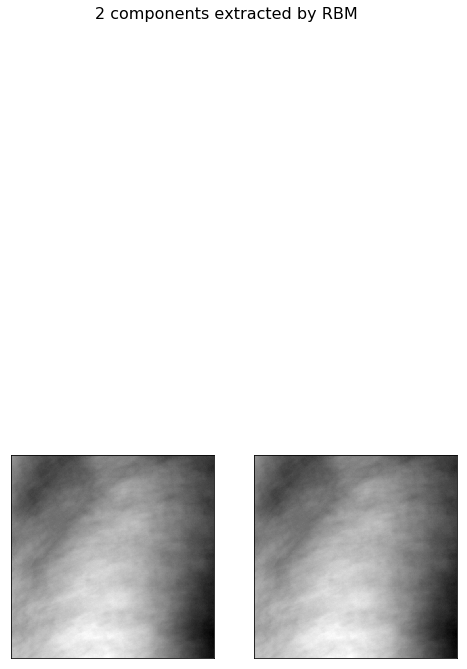

In [10]:
# Models we will use
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000,
                                           multi_class='multinomial')
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 2
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.
raw_pixel_classifier.fit(X_train, Y_train)

# #############################################################################
# Evaluation

Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Y_pred = raw_pixel_classifier.predict(X_test)
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

# #############################################################################
# Plotting

plt.figure(figsize=(16, 32))
for i, comp in enumerate(rbm.components_):
    plt.subplot(1, 2, i + 1)
    plt.imshow(comp.reshape((512, 512)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('2 components extracted by RBM', fontsize=16)
#plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()